# Homework 2

MATH 104A Intro to Numerical Analysis

Harry Coleman

November 7, 2020

## Exercise 1

#### Exercise 1(a)

---

Write the Lagrangian form of the interpolating polynomial $P_2(x)$ corresponding to the data in the table below:
$$
    \begin{array}{c|c}
        x_j & f(x_j) \\
        \hline
        0 & 1 \\
        1 & 1 \\
        3 & -5
    \end{array}
$$

---

The Lagrangian form of the interpolating polynomial is given by
$$P_2(x) = \ell_0^{(2)}(x)f(x_0) + \ell_1^{(2)}(x)f(x_1) + \ell_2^{(2)}(x)f(x_2),$$
where
$$\ell_j^{(2)} = \prod_{i\in\{0,1,2\}\setminus\{j\}} \frac{x-x_i}{x_j-x_i}.$$
We solve for $\ell_j^{(2)}(x)$ for $j=0,1,2$:
\begin{align*}
    \ell_0^{(2)}(x)
        &= \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} \\
        &= \frac{(x-1)(x-3)}{(0-1)(0-3)} \\
        &= \frac{x^2 - 4x + 3}{3} \\
        &= \frac13x^2 - \frac43x + 1,
\end{align*}

\begin{align*}
    \ell_1^{(2)}(x)
        &= \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} \\
        &= \frac{(x-0)(x-3)}{(1-0)(1-3)} \\
        &= \frac{x^2 - 3x}{-2} \\
        &= -\frac12x^2 + \frac32x,
\end{align*}

\begin{align*}
    \ell_2^{(2)}(x)
        &= \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \\
        &= \frac{(x-0)(x-1)}{(3-0)(3-1)} \\
        &= \frac{x^2 - x}{6} \\
        &= \frac16x^2 - \frac16x.
\end{align*}
We now solve for the Lagrangian interpolating polynomial $P_2(x)$:
\begin{align*}
    P_2(x) 
        &= \ell_0^{(2)}(x)f(x_0) + \ell_1^{(2)}(x)f(x_1) + \ell_2^{(2)}(x)f(x_2) \\
        &= \left(\frac13x^2 - \frac43x + 1\right)\cdot1 + \left(-\frac12x^2 + \frac32x\right)\cdot1 + \left(\frac16x^2 - \frac16x\right)\cdot(-5)\\
        &= \left(\frac26 -\frac36 - \frac56\right)x^2 + \left(-\frac86 + \frac96 + \frac56 \right)x + 1 \\
        &= -x^2 + x + 1.
\end{align*}



#### Exercise 1(b)

---

Use $P_2(x)$ you obtained in (a) to approximate $f(2)$.

---

$$f(2) \approx P_2(2) = -2^2 + 2 + 1 = -1.$$

## Exercise 2

#### Exercise 2(a)

---

Implement the Barycentric Formula for evaluating the interpolating polynomial for arbitrarily distributed nodes $x_0,\dots, x_n$; you need to write a function or script that computes the barycentric weights $\lambda_j^{(n)} = 1/\Pi_{k\ne j}(xj-x_k)$ first and another code to use these values in the Barycentric Formula. Make sure to test your implementation.

---

We first define a function which takes a list of nodes $X=[x_0,\dots,x_n]$ and computes the barycentric weighs $\lambda^{(n)}_j$. This computation is performed recursively in the sense that each $\lambda^{(m)}_j$ is computed using the value of $\lambda^{(m-1)}_j$. For this reason, we define a 2-dimensional list, $weights$, to store the values of $\lambda^{(m)}_j$ for $m=0,\dots,n$, $j=0,\dots,m$, and initialize the value $\lambda^{(0)}_0 = 1$. After all values have been computed, we return the final list in $weights$, which is all $\lambda^{(n)}_j$ for $j=0,\dots,n$, i.e., the weights necessary for the barycentric formula.

In [1]:
import math

def barycentric_weights_2a(X):
    n = len(X) - 1
    weights = [[0 for _ in range(0, m+1)] for m in range(0, n+1)]
    weights[0][0] = 1
    
    for m in range(1, n+1):
        for j in range(0,m):
            weights[m][j] = weights[m-1][j] / (X[j] - X[m])
        
        weights[m][m] = 1 / math.prod([X[m] - X[j] for j in range(0, m)])
    
    return weights[n]
    

To evaluate the interpolating polynomial of $f$ at a given point $x$ with the barycentric formula, we require the three lists $X=[x_0,\dots,x_n]$, $F=[f(x_0), \dots, f(x_n)]$, and $W=[\lambda^{(n)}_0,\dots,\lambda^{(n)}_n]$. The following function calculates the numerator and denominator of the result of the barycentric formual, iteratively, over all $j=0,\dots,n$, and returns the quotient.

In [2]:
def barycentric_formula(X, F, W, x):
    A, B = 0, 0
    
    for j in range(0, len(X)):
        A += W[j] * F[j] / (x - X[j])
        B += W[j] / (x - X[j])
    
    return A / B
    

#### Exercise 2(b)

---

Consider the following table of data.
$$
    \begin{array}{c|c}
        x_j &  f(x_j) \\
        \hline
        0.00 & \phantom{-}0.0000 \\
        0.25 & \phantom{-}0.7071 \\
        0.50 & \phantom{-}1.0000 \\
        0.75 & \phantom{-}0.7071 \\
        1.25 & -0.7071 \\
        1.50 & -1.0000
    \end{array}
$$
Use your code in (a) to find $P_5(2)$ as an approximation of $f(2)$.

---

In [3]:
X_2b = [0, 0.25, 0.5, 0.75, 1.25, 1.5]
F_2b = [0, 0.7071, 1, 0.7071, -0.7071, -1]
W_2b = barycentric_weights_2a(X_2b)

barycentric_formula(X_2b, F_2b, W_2b, 2)

0.8519999999999989

## Exercise 3

---

*The Runge Example*. Let
$$ f(x) = \frac1{1+x^2}, \quad x\in[-5,5]. \tag{1} $$
Using your Barycentric Formula code (Prob. 2) and (2) and (3) below, evaluate and plot the
interpolating polynomial of $f(x)$ corresponding to...


**Remark 1.**  It can be shown that for equidistributed nodes one can use the barycentric weights
$$ \lambda^{(n)}_j = (-1)^j{n \choose j}, \quad j=1,\dots,n. \tag{2}$$
It can be show that for the nodes $\displaystyle x_j = \frac{a+b}2 + \frac{b-a}2\cos\left(\frac{j\pi}n\right), j=0,\dots,n$ in $[a,b]$, one can use
$$\lambda^{(n)}_j = \begin{cases}
    \frac12(-1)^j &\text{for $j=0$ or $j=n$}, \\
    (-1)^j &\text{for $j=1,\dots,n-1$}.
\end{cases} \tag{3}$$



---

#### Exercise 3(a)

---

the equidistributed nodes $x_j=-5+j(10/n), j=0,\dots,n$ for $n=4,8,12$.

---

We first redefine the barycentric weights functions to employ (2).

In [4]:
def barycentric_weights_3a(n):
    return [(-1)**j * math.comb(n, j) for j in range(0,n+1)]

The following function takes $n$ as a parameter, and constructs the corresponding lists of $X$, $F$, and $W$. It then plots the interpolating polynomial at $N$ equidistributed points, using the barycentric formula.

In [5]:
import matplotlib.pyplot as plt

def plot_approx_3a(n):
    X = [-5 + j * 10 / n for j in range(0,n+1)]
    F = [1 / (1 + x**2) for x in X]
    W = barycentric_weights_3a(n)
    
    N = 5000
    X_dom = [x for x in [-5 + k * 10 / N for k in range(0,N+1)] if x not in X]
    F_approx = [barycentric_formula(X, F, W, x) for x in X_dom]

    plt.plot(X, F)
    plt.plot(X_dom, F_approx)
    plt.show()

We now plot $f$ against the interpolating polynomial approximation for $n=4,8,12$.

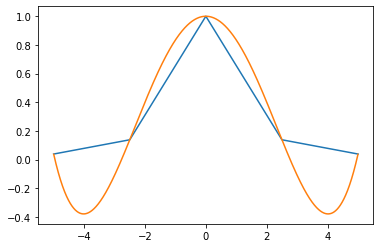

In [6]:
plot_approx_3a(4)

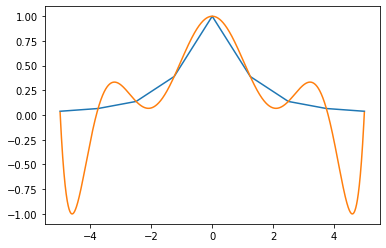

In [7]:
plot_approx_3a(8)

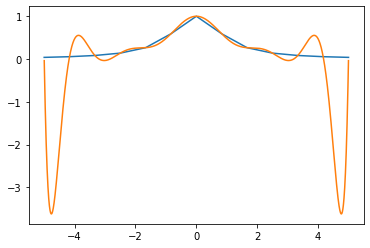

In [8]:
plot_approx_3a(12)

#### Exercise 3(b)

---

the nodes $\displaystyle x_j = 5\cos\left(\frac{j\pi}n\right), j=0,\dots,n$ for $n=4,8,12,100$.

---

We first redefine the barycentric weights functions to employ (2).

In [9]:
def barycentric_weights_3b(n):
    return [(-1)**j / 2 if j in [0,n] else (-1)**j for j in range(0,n+1)]

We use essentially the same plotting function as in 3(a), but with a different construction of $X$ and the new barycentric weights

In [10]:
def plot_approx_3b(n):
    X = [5 * math.cos(j * math.pi / n) for j in range(0,n+1)]
    F = [1 / (1 + x**2) for x in X]
    W = barycentric_weights_3b(n)
    
    N = 5000
    X_dom = [x for x in [-5 + k * 10 / N for k in range(0,N+1)] if x not in X]
    F_approx = [barycentric_formula(X, F, W, x) for x in X_dom]

    plt.plot(X, F)
    plt.plot(X_dom, F_approx)
    plt.show()

We now plot $f$ against the interpolating polynomial approximation for $n=4,8,12,100$.

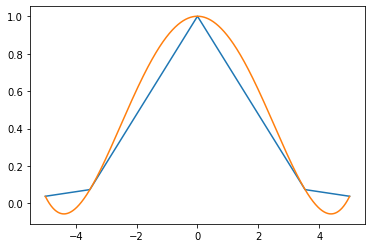

In [11]:
plot_approx_3b(4)

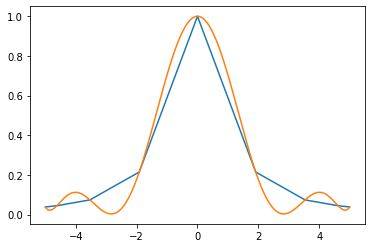

In [12]:
plot_approx_3b(8)

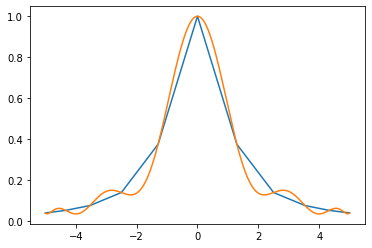

In [13]:
plot_approx_3b(12)

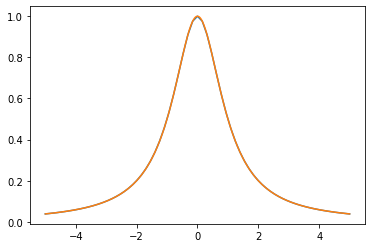

In [14]:
plot_approx_3b(100)

#### Exercise 3(c)

---

Repeat (a) for $f(x) = e^{-x^2/5}$ for $x\in[-5,5]$ and comment on the result.

---

We use the same function as in 3(a), but the construction of $F$ uses the new value of $f(x)$.

In [15]:
def plot_approx_3c(n):
    X = [-5 + j * 10 / n for j in range(0,n+1)]
    F = [math.exp(-x**2 / 5) for x in X]
    W = barycentric_weights_3a(n)
    
    N = 5000
    X_dom = [x for x in [-5 + k * 10 / N for k in range(0,N+1)] if x not in X]
    F_approx = [barycentric_formula(X, F, W, x) for x in X_dom]

    plt.plot(X, F)
    plt.plot(X_dom, F_approx)
    plt.show()

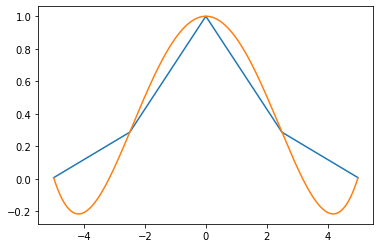

In [16]:
plot_approx_3c(4)

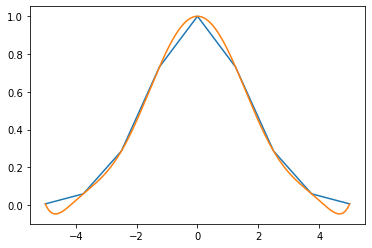

In [17]:
plot_approx_3c(8)

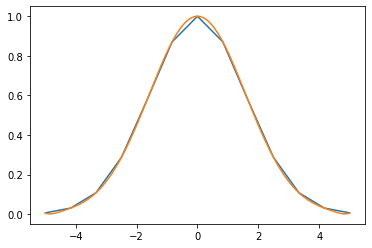

In [18]:
plot_approx_3c(12)

$$\frac{(2n)!}{2^n(n!)^2(n+1)}$$

Evidently, the polynomial interpolation appears to quickly, and uniformly, converge to the function in 3(c), but the polynomial interpolation appears to converge quite slowly. And it is not clear that this convergence is uniform over all $x\in[-5,5]$, as it seems to be getting worse towards the extremes of the interval. 

Recall the function given by (1),
$$ f(x) = \frac1{1+x^2}, \quad x\in[-5,5]. \tag{1} $$
Consider the polynomial $P_n(x)$ interpolating $f$ at the $n+1$ equidistributed points $x_1,\dots,x_n$. Then, we have the error bound
$$|f(x) - P_n(x)| \leq \| f - P_n\|_\infty = \max_{x\in[-5,5]}\left|\frac{f^{(n+1)}(\xi_x)}{(n+1)!}\prod_{j=1}^n(x-x_j)\right|,$$
for some $\xi_x \in [-5,5]$. Anecdotally, it seems to be the case that the error is tending to infinity between the first pair of points. Consider the error at this point $x=-5+\frac5n\in[-5,5]$, then using the formula for the equidistributed points, we find
\begin{align*}
    \left|\prod_{j=1}^n(x-x_j)\right|
        &= \left|\prod_{j=1}^n\left(-5+\frac5n-\left(-5 + \frac{10}{n} j\right)\right)\right| \\
        &= \left|\prod_{j=1}^n\frac5n(1- 2j)\right| \\
        &= \left|\left(\frac5n\right)^{n+1}\prod_{j=1}^n(1-2j)\right| \\
        &= \left(\frac5n\right)^{n+1}\prod_{j=1}^n|1-2j| \\
        &= \left(\frac5n\right)^{n+1}(1)(3)(5)\cdots(2n-1) \\
        &= \left(\frac5n\right)^{n+1}\frac{(2n)!}{2^nn!}.
\end{align*}
Then
$$\| f - P_n\|_\infty \geq |f(x) - P_n(x)| = f^{(n+1)}(\xi_x) \cdot \left(\frac5n\right)^{n+1} \cdot \frac{(2n)!}{2^nn!(n+1)!} = f^{(n+1)}(\xi_x) \cdot \frac{5^{n+1}}{2^nn^{n+1}(n+1)}{2n \choose n}.$$
The factor on the right tends to zero as $n$ tends towards infinity. The $n$th derivative of $f$ is seems to get larger for larger $n$. Some manipulation of these limits might derive that the maximum error of $P_n$ is unbounded as $n\to\infty$, but I was unable to show this. However, this would imply that the convergence is not uniform over $[-5,5]$. On the other hand, it could likely be shown that the convergence in 3(c) is uniform.

## Exercise 4

#### Exercise 4(a)

---

Let $f\in C^2[x_0,x_1]$ and $P_1$ its interpolation linear polynomial at $x_0$ and $x_1$. Prove that
$$\|f-P_1\|_\infty \leq \frac18(x_1-x_0)^2M_2, \tag{4}$$
where $|f''(x)|\leq M_2$ for all $x\in[x_0,x_1]$ and $\|f- P_1\|_\infty = \max_{x\in[x_0,x_1]}|f(x)-P_i(x)|$. 

---

By definition of the $\infty$-norm, we have
$$\|f-P_1\|_\infty = |f(x) - P_1(x)|,$$
for a particular $x\in[x_0,x_1]$. Note that because $x$ is between $x_0$ and $x_1$, we have
$$|x-x_0|\cdot|x-x_1| \leq \frac12|x-x_1|\cdot\frac12|x_1-x_0|.$$
Now we have
$$|f(x) - P_1(x)| = \left|\frac{f''(\xi_x)}{(1+1)!}(x-x_0)(x-x_1)\right| = \frac12|x-x_0|\cdot|x-x_1|\cdot|f''(\xi_x)|,$$
for some $\xi_x\in[x_0,x_1]$. Therefore,
$$\|f-P_1\|_\infty \leq \frac12\cdot\frac12|x_1-x_0|\cdot\frac12|x_1-x_0|\cdot M_2 = \frac18(x_1-x_0)^2M_2.$$

#### Exercise 4(b)

---

Let $P_1(x)$ be the linear polynomial that interpolates $f(x)=\sin x$ at $x_0=0$ and $x_1 = \pi/2$. Using (a), find a bound for the maximum error $\|f-P_1\|_\infty$ and compare this bound with the actual erro at $x=\pi/4$.

---

Since $f(x) = \sin x$, then $f''(x) = -\sin x$, so $|f''(x) \leq 1|$ for all $x\in[0,\pi/2]$. Applying (a), we find
$$\|f-P_1\|_\infty \leq \frac18(\pi/2 - 0)^2\cdot 1 = \frac{\pi^2}{32} \approx 0.3084.$$
Now we compute $P_1(\pi/4)$:
$$P_1(\pi/4) = \frac{\pi/4 - \pi/2}{\pi/2 - 0}\cdot 0 + \frac{\pi/4 - 0}{\pi/2 - 0} \cdot 1 = \frac12.$$
So
$$|\sin\pi/4 - P_1(\pi/4)| = \left|\frac1{\sqrt{2}} - \frac12\right| \approx 0.2071 \leq 0.3084.$$